##  Open charm
The high luminosity at the EIC would allow measurements of open charm production with much higher rates than at HERA and COMPASS, extending the kinematic coverage to large $x_B > ∼ 0.1 $ and rare processes such as high-$p_T$ jets. Heavy quark production with electromagnetic probes could for the first time be measured on nuclear targets and used to study the gluonic structure of nuclei and the propagation of heavy quarks through cold nuclear matter with full control of the initial state.

<img src="../img/open_charm_02.png" alt="drawing" style="height:150px;"/>

### Event selection for exclusive  D0 decay: 

- Pt > 0.1 GeV 
- Request only charged tracks/particles 
- Opposite charge for pions and kaons for D0
- Displaced vertex for  (𝜋𝐾)> 100 𝜇𝑚
- Distance  between (𝜋𝐾)<  50 𝜇𝑚

### Selection for D∗+ → 𝜋+slow + (K−𝜋+)D0 selection for D0 

- 1.79 GeV <  D0 ( inv mass 𝜋𝐾)  <  1.93 GeV 
- Request right charge for slow pion 

### Selection for D+

- Similar to D*, but without mass cut for D0
- Displaced vertex for third pion 
- Distance between (𝜋𝐾𝜋) < 50 𝜇𝑚

<img src="../img/open_charm_03.png" alt="drawing" style="height:200px;"/>

In [ ]:
print("Hello EIC!!")

In [ ]:
from IPython.display import Math
Math('\Delta = b^2-4ac')

In [4]:
import ROOT
import math
import pyjano

%jsroot off

Welcome to JupyROOT 6.18/00


In [5]:
file_sm0 = ROOT.TFile('../data/open_charm_nosm_200k.root')
file_sm1 = ROOT.TFile('../data/open_charm_sm_200k.root')

In [6]:
dirs = [file_sm0.Get('opencharm'), file_sm1.Get('opencharm')]

# the next has to be replaced
for name in [key.GetName() for key in dirs[0].GetListOfKeys()]:
    py_name = name.lower()
    exec("{py_name} = [d.Get('{name}') for d in dirs]".format(py_name=py_name, name=name))

In [7]:
canvas1 = ROOT.TCanvas('canvas1', 'canvas1', 550, 350)
canvas2 = ROOT.TCanvas('canvas2', 'canvas2', 700, 450)
canvas2.Divide(2)

def draw_hist(hist, log=False):
    canvas1.cd().SetLogy(log)
    hist.SetStats(False)
    hist.Draw()
    canvas1.Draw()
    
def draw_hists(hists, log=False, opt=''):
    if 'true MC' not in hists[0].GetTitle():
        hists[0].SetTitle(hists[0].GetTitle() + ' (true MC)')
    if 'smear' not in hists[1].GetTitle():
        hists[1].SetTitle(hists[1].GetTitle() + ' (smeared)')
    for i in range(2):
        if opt=='same':
            hists[i].SetLineColor(ROOT.kRed)
        canvas2.cd(i+1).SetLogy(log)
        hists[i].SetStats(False)
        hists[i].Draw(opt)
    canvas2.Draw()

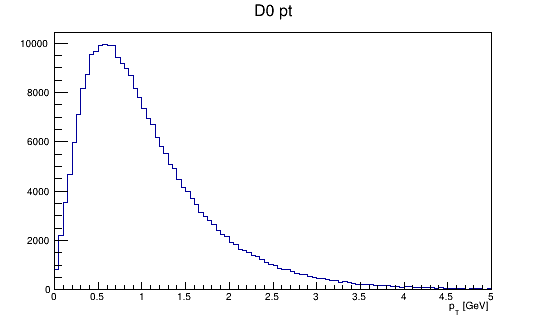

In [8]:
draw_hist(d0_pt[0])

In [9]:
d0_canvas = ROOT.TCanvas('d0_canvas', 'canvas1', 450, 350)
total = ROOT.TF1( 'total1', 'expo(0)+gaus(2)', 1.7, 2.1 )

if 'true MC' not in d0_mass[0].GetTitle():
    d0_mass[0].SetTitle(d0_mass[0].GetTitle() + ' (true MC)')
if 'smear' not in d0_mass[1].GetTitle():
    d0_mass[1].SetTitle(d0_mass[1].GetTitle() + ' (smeared)')

canvas2.cd(1).SetLogy(False)
d0_mass[0].SetStats(False)
d0_mass[0].SetXTitle('[GeV]')
d0_mass[0].Draw()

 FCN=58.4101 FROM MIGRAD    STATUS=CONVERGED     173 CALLS         174 TOTAL
                     EDM=9.89667e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.95995e+00   1.41028e-01  -8.90120e-05   5.82700e-03
   2  p1          -1.80460e+00   7.48115e-02   3.76975e-05   1.12053e-02
   3  p2           7.27544e+02   1.70475e+01   2.02892e-02   1.62589e-07
   4  p3           1.86505e+00   4.33509e-04  -2.82441e-07  -5.19869e-03
   5  p4           1.90785e-02   4.17110e-04   2.86822e-07   1.00398e-01


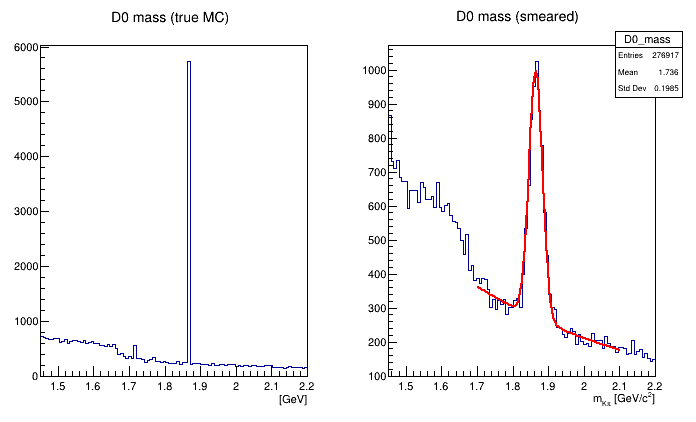

In [10]:
canvas2.cd(2)

total.SetParameter(0, 7.5)   # Set initial fit parameters
total.SetParameter(1, -1.5)
total.SetParameter(2, 400)
total.SetParameter(3, 1.87)
total.SetParameter(4, 0.01)

d0_mass[1].Fit(total,"R")   # Fit to the function
d0_mass[1].Draw()           # Draw the histogram
total.Draw("same")
canvas2.Draw()

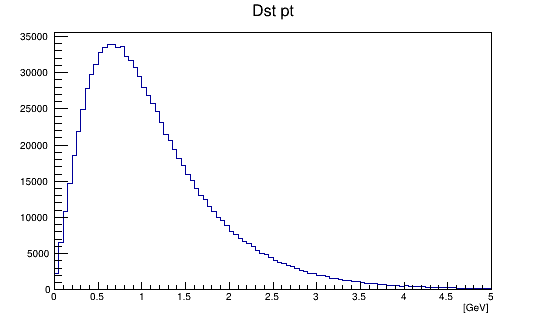

In [11]:
dst_pt[0].SetXTitle('[GeV]')
draw_hist(dst_pt[0])

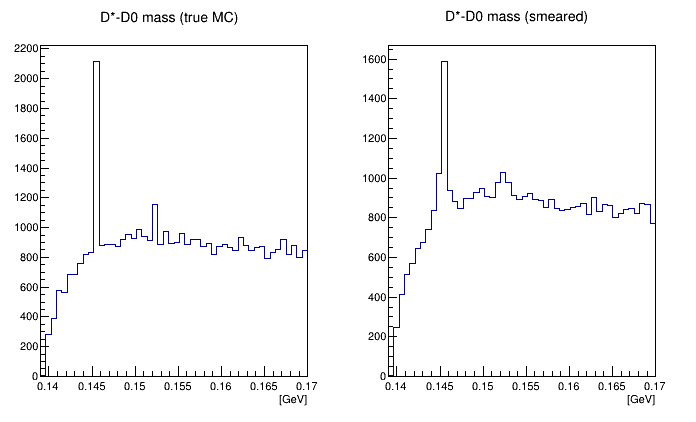

In [12]:
dst_dm[0].SetXTitle('[GeV]')
dst_dm[1].SetXTitle('[GeV]')
draw_hists(dst_dm)

#### Cut:
$Mass(D^{0})\in\left[1.79;1.93\right] $

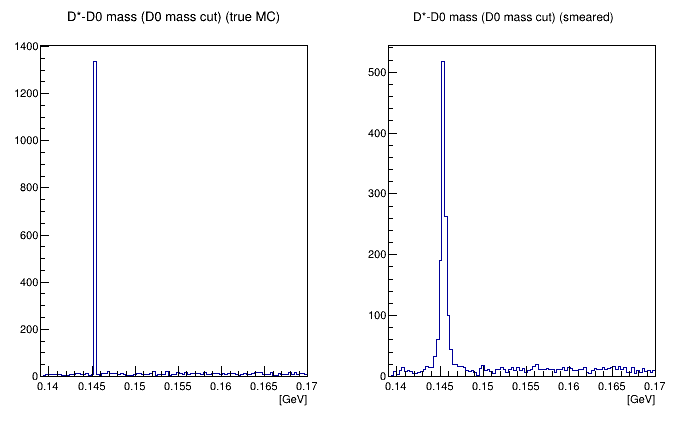

In [13]:
dst_dm_mcut[0].SetXTitle('[GeV]')
dst_dm_mcut[1].SetXTitle('[GeV]')
draw_hists(dst_dm_mcut)

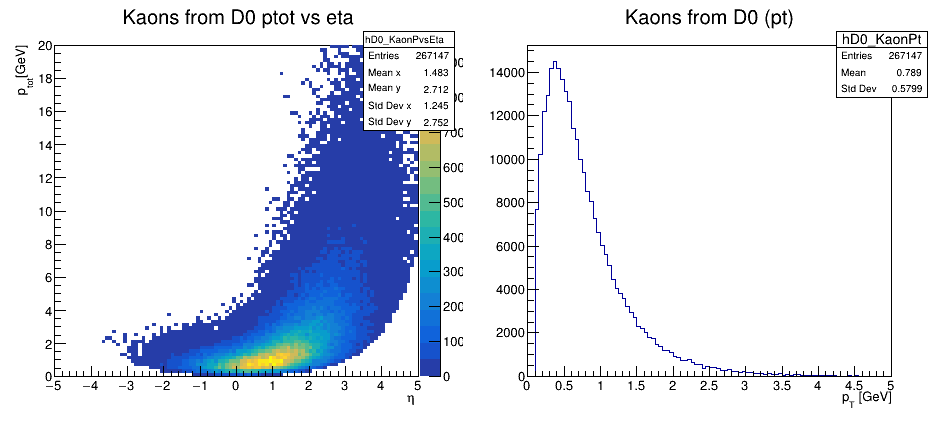

In [14]:
k_vs_eta_canvas = ROOT.TCanvas('k_vs_eta_canvas', 'k_vs_eta_canvas', 950, 450)
k_vs_eta_canvas.Divide(2)
k_vs_eta_canvas.cd(1)
hd0_kaonpvseta[1].Draw("colz")

k_vs_eta_canvas.cd(2)
hd0_kaonpt[1].Draw()

k_vs_eta_canvas.Draw()
